In [1]:
## Importing all the important stuff
from dat_to_tif import dat_to_tif
import numpy as np
import os
from dat_from_file import dat_from_file
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
from scipy.fft import fft, ifft, ifftshift, fftshift


def read_tif(fname):
    im = Image.open(fname)
    print('IN: {} [Image size: {}, Image mode: {}]'.format(fname, im.size, im.mode))
    return im


In [4]:
## Raw dat input directory
# Change this depending on the run
spool_directory = 'D:/Nigel_Naked_Test2_Fine_run2/spool/SpoolDirectory'
## Tif output directory
# Change this depending on the run
tif_directory = 'D:/SAXS-WAXS_test_data/fout'
DFdir = 'D:/SAXS-WAXS_test_data/DF'
spool_dirs = 8 # input number of spool directories
spool_dirs_i = [0, 1, 2, 3, 4, 5, 6, 7, 8] #  Need to automate this line
print(spool_dirs_i)

[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [5]:
## Loop to convert files to tif
for dir_num in spool_dirs_i:
    full_path = spool_directory + str(dir_num)
    dat_from_file(full_path, tif_directory, dim=2048, tifsperdat=3, override=False)

index=1 dat=SpoolData0.dat
index=2 dat=SpoolData1.dat
index=3 dat=SpoolData2.dat
index=4 dat=SpoolData3.dat
index=5 dat=SpoolData4.dat
index=6 dat=SpoolData5.dat
index=7 dat=SpoolData6.dat
index=8 dat=SpoolData7.dat
index=9 dat=SpoolData8.dat
index=10 dat=SpoolData9.dat
Directory: D:/Nigel_Naked_Test2_Fine_run2/spool/SpoolDirectory0 Complete! :D
index=1 dat=SpoolData10.dat
index=2 dat=SpoolData11.dat
index=3 dat=SpoolData12.dat
index=4 dat=SpoolData13.dat
index=5 dat=SpoolData14.dat
index=6 dat=SpoolData15.dat
index=7 dat=SpoolData16.dat
index=8 dat=SpoolData17.dat
index=9 dat=SpoolData18.dat
index=10 dat=SpoolData19.dat
Directory: D:/Nigel_Naked_Test2_Fine_run2/spool/SpoolDirectory1 Complete! :D
index=1 dat=SpoolData20.dat
index=2 dat=SpoolData21.dat
index=3 dat=SpoolData22.dat
index=4 dat=SpoolData23.dat
index=5 dat=SpoolData24.dat
index=6 dat=SpoolData25.dat
index=7 dat=SpoolData26.dat
index=8 dat=SpoolData27.dat
index=9 dat=SpoolData28.dat
index=10 dat=SpoolData29.dat
Directory: D:

In [7]:
## Log file manipulation
logdir = "./livelogfile.log" #input location of log file
biglog = open(logdir, 'r')
contents = biglog.readlines()
type(contents)
num_lines = len(contents)
print(["Number of lines:", str(num_lines)])
rows = list(range(0, num_lines-1))

I0_column = 20 #Change depending on the column that I0 is in
I0 = list(range(0, num_lines-1)) # work out the length (height) of the I0 array
for row in rows: #loops through rows to populate the I0 array with values from the logfile
    row_n = contents[row] 
    # The lines down here isolate the values from the column.
    split_lines = row_n.split(" ") # splits up the logfile line using spaces as a delimeter
    I0_list = str(split_lines[20])
    I0_str = (I0_list.split('"'))
    I0[row] = I0_str[1] #populates the I0 array with values from the log
#plt.plot(rows, I0)


['Number of lines:', '8268']


In [8]:
# Split the dark frames from the actualy data??

## Set up a DF correction array to subract from the data below
#for D in D_frames:
#    read_tif()
## For now (testing purposes) we can just make the dark field counts be 300
DF_mean = 300

IN: D:/SAXS-WAXS_test_data/fout/2.tif [Image size: (2048, 2048), Image mode: I]
3336933422.0
1629362.0224609375


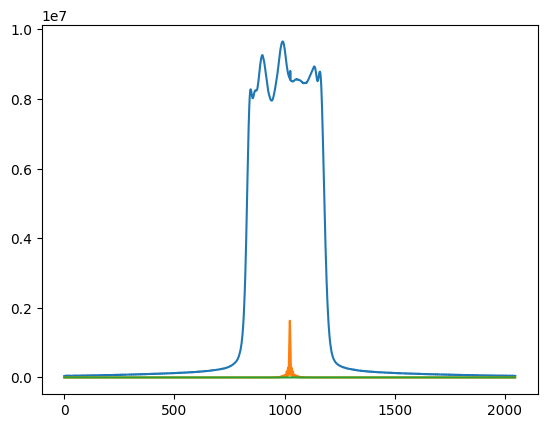

In [13]:
# The initial reconstruction should be done here. We need to pick a test tiff to decide the location of the region of interest for the phase spectrum.
test_frame = read_tif(tif_directory + '/2.tif')

test_data = np.double(np.array(test_frame, dtype='d'))

# integrated counts
integ = sum(sum(test_data[:] - DF_mean))
print(integ)
# DF Correction

# index the middle line of the array for the 1-dimensional cross-section
# one_d = data2[1024, :] # Line through x
one_d = np.sum((test_data - DF_mean), 1) # Line through y
plt.plot(one_d)
plt.savefig('./figures/1d_profile.png')
#plt.close()
#plt.show()

# ifft this middle line, angle for phase and abs(max(ifft))^2 for absorption
recon = ifftshift(ifft(one_d))
absorption = np.sqrt(abs(max(recon))*abs(max(recon)))
print(absorption)
phase = np.unwrap(np.angle(recon))

plt.plot(abs(recon))
plt.savefig('./figures/1d_abs.png')
#plt.show()
#plt.close()

plt.plot(phase)
plt.savefig('./figures/1d_phase.png')
#plt.show()
#plt.close()
# Scan this through energy

In [ ]:
DFs = [1, 254]
F = 1
print(DFdir + str(DFs[F]) + '.tif')
test_frame = read_tif(tif_directory + '/2.tif')
DF_tif = DFdir + str(DFs[F]) + '.tif'

f_import = read_tif(DF_tif)

In [ ]:
## Now we run these calculations per frame.

#integ_F = []
integ_F = np.zeros((1, (len(os.listdir(tif_directory)))+2), dtype=np.float64, order='C')
#integ_F = list(range(1, (len(os.listdir(tif_directory)))+1))


#recon_F = []
#recon_F = list(range(1, (len(os.listdir(tif_directory)))+1))
recon_F = np.zeros((1, (len(os.listdir(tif_directory)))+2), dtype=np.float64, order='C')
print(recon_F.size)
print(recon_F[0, 1])
#phase_F = []
#phase_F = list(range(1, len(os.listdir(tif_directory)))+1)
phase_F = np.zeros((1, (len(os.listdir(tif_directory)))+2), dtype=np.float64, order='C')

DFs = [1, 254] # Need some way to automate this
i = 0
for F in DFs:
    DFname = DFdir + str(DFs[i]) + '.tif'
    f_import = read_tif(DFname)
    DF_data = np.double(np.array(f_import, dtype='d'))
    DFs[i] = DF_data

    i = i + 1
DF_mean = np.divide(np.add(DFs[0], DFs[1]), 2)

for (f_num, frame_name) in enumerate(sorted(os.listdir(tif_directory)), 1):
    f_import = read_tif(tif_directory + '/' + frame_name)
    frame_data = np.double(np.array(f_import, dtype='d'))
    DF_corr = np.subtract(frame_data, DF_mean)
    # Need to divide by I0
    one_d = DF_corr[:, 1024] # Line through y
    recon = ifftshift(ifft(one_d))

    #integ_F[f_num] = 
    recon_F[0, f_num] = np.sqrt(abs(max(recon))*abs(max(recon)))
    phase = np.unwrap(np.angle(recon))
    phase_F[0, f_num] = phase[550]
    #recon_F.append(np.sqrt(abs(max(recon))*abs(max(recon))))
    #phase_F.append(np.unwrap(np.angle(recon)))

plt.plot(recon_F[0, :])
plt.show()

plt.plot(phase_F[0, :])
plt.show()
